# Import

In [1]:
import numpy as np
import copy
from matplotlib import pyplot as plt

# Funkcja wczytywania danych

In [2]:
def load_samples_with_text(plik_z_wartosciami):
    data = []
    with open(plik_z_wartosciami) as file:
        for line in file:
            raw_val = line.strip().split()
            val = [float(val) for val in raw_val]
            data.append(val)
    return data

# Wczytanie danych

In [3]:
data = load_samples_with_text("spirala.txt")

# Generowanie środków

In [4]:
def generate_centers(data, k):
    centers = []
    for i in range(k):
        random_index = np.random.randint(len(data))
        centers.append(data[random_index])
    return np.asarray(centers)

# Grupowanie punktów

In [5]:
def cluster_points(data, centers, k):
    clusters = []
    for i in range(len(data)):
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(np.subtract(data[i], centers[j])))
        index = np.argmin(distance)
        clusters.append(index)
    return np.asarray(clusters)

# Powtarzanie kroków do minimalnej różnicy

In [6]:
def difference_is_enough(old, new):
    diff = 0
    for i in range(len(old)):
        diff += np.linalg.norm(old[i] - new[i])
    print(diff)
    if diff == 0:
        return True
    else:
        return False

# Aktualizowanie środków

In [7]:
def update_centers(data, clusters, k):
    center = []
    for i in range(k):
        temp = []
        for j in range(len(data)):
            if clusters[j] == i:
                temp.append(data[j])
        center.append(np.mean(temp, axis=0))
    return np.asarray(center)

# Pętla algorytmu

In [8]:
centers = generate_centers(data, 4)
clusters = cluster_points(data, centers, 4)


def alg_loop(data, clusters, centers):
    old_centers = centers
    new_centers = update_centers(data, clusters, 4)
    new_clusters = cluster_points(data, new_centers, 4)
    while True:
        if difference_is_enough(old_centers, new_centers):
            return new_centers, new_clusters
        else:
            old_centers = copy.copy(new_centers)
            old_clusters = copy.copy(new_clusters)
            new_centers = update_centers(data, old_clusters, 4)
            new_clusters = cluster_points(data, old_centers, 4)


centers2, clusters2 = alg_loop(data, clusters, centers)

2.2750570079785613
0.8316574068153986
0.0


# Umieszczenie pogrupowanych punktów na wykresie

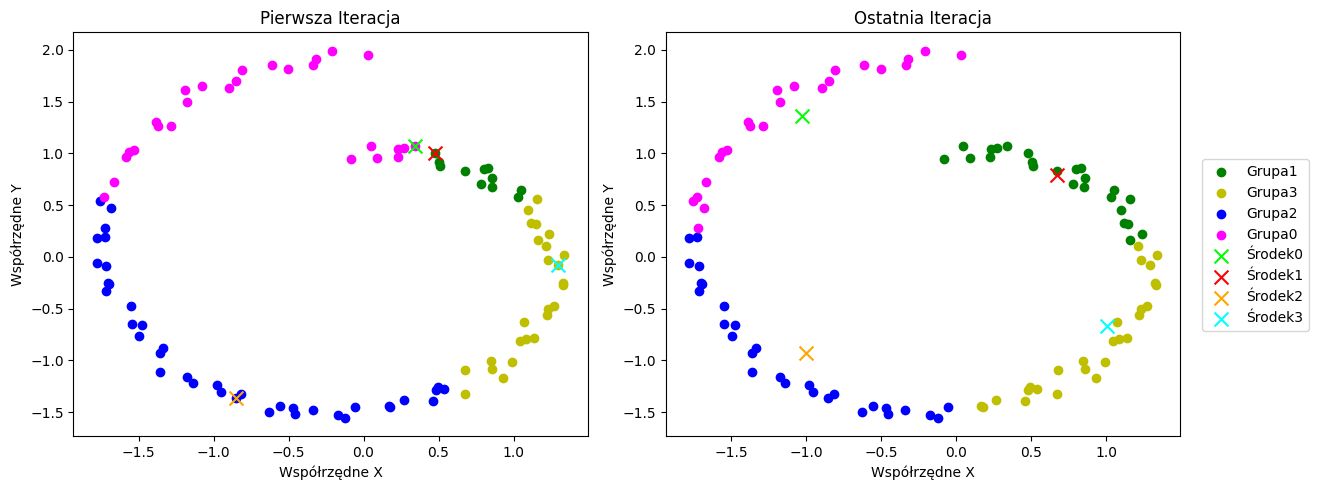

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = {0: 'magenta', 1: 'g', 2: 'b', 3: 'y'}
middle_colors = {0: "#00FF00", 1: "r", 2: "orange", 3: "cyan"}
plotted_clusters = set()

for i in range(len(clusters)):
    ax1.scatter(data[i][0], data[i][1], color=colors[clusters[i]])
for i in range(len(centers)):
    ax1.scatter(centers[i][0], centers[i][1], s=100, marker='x', color=middle_colors[i])

for i in range(len(clusters2)):
    cluster = clusters2[i]
    if cluster not in plotted_clusters:
        ax2.scatter(data[i][0], data[i][1], color=colors[clusters2[i]], label=f'Grupa{clusters2[i]}')
        plotted_clusters.add(cluster)
    else:
        ax2.scatter(data[i][0], data[i][1], color=colors[clusters2[i]])
for i in range(len(centers2)):
    ax2.scatter(centers2[i][0], centers2[i][1], s=100, marker='x', color=middle_colors[i], label=f'Środek{i}')
# Combine legend handles and labels from both subplots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
legend = []
for i in range(8):
    if i < 4:
        legend.append(f'Grupa{i}')
    else:
        legend.append(f'Środek{i - 4}')
sorted_handles = [handles[labels.index(label)] for label in legend]
ax1.set_xlabel("Współrzędne X")
ax2.set_xlabel("Współrzędne X")
ax1.set_ylabel("Współrzędne Y")
ax2.set_ylabel("Współrzędne Y")
ax1.title.set_text('Pierwsza Iteracja')
ax2.title.set_text('Ostatnia Iteracja')
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()